### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import *
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
import pickle

### Read dataset 

In [6]:
data = pd.read_csv('../Data/IMDB Dataset.csv')


In [7]:
### read first 5 data
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [8]:
### show shape of data
data.shape

(50000, 2)

In [22]:
data=data[:10000]

In [23]:
### show shape of data
data.shape

(10000, 3)

In [29]:
data['sentiment'].value_counts()

1    5030
0    4970
Name: sentiment, dtype: int64

In [34]:
### some additional info abut data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 10016
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review       10000 non-null  object
 1   sentiment    10000 non-null  int64 
 2   Total Words  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 312.5+ KB


In [36]:
### Print first two review along with sentiment
for i in range(2):
    print("Review: ",[i])
    print(data['review'].iloc[i],"\n")
    print("Sentiment: ",data['sentiment'].iloc[i] ,"\n")

Review:  [0]
one reviewers mentioned watching 1 oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mann

In [38]:
### function to find total number of words in each review(takes text reviw and count number of words)
def no_of_words(text):
    words = text.split()
    word_count = len(words)
    return word_count

In [39]:
### apply the above function of word count in dataset
data['Total Words'] = data['review'].apply(no_of_words)

In [40]:
data.head()

,review,sentiment,Total Words
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
3,basically theres family little boy jake thinks...,0,67
4,petter matteis love time money visually stunni...,1,125


In [42]:
### Convert target column into numerical column(replace positive value with 1 and negative value with 0)
data.sentiment.replace("positive", 1 ,inplace = True)
data.sentiment.replace("negative", 0 ,inplace = True)

In [43]:
data.head(10)

,review,sentiment,Total Words
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
3,basically theres family little boy jake thinks...,0,67
4,petter matteis love time money visually stunni...,1,125
5,probably alltime favorite movie story selfless...,1,58
6,sure would like see resurrection dated seahunt...,1,76
7,show amazing fresh innovative idea 70s first a...,0,83
8,encouraged positive comments film looking forw...,0,64
9,like original gut wrenching laughter like movi...,1,17


### Text Proceessing used to process text data and convert  into usable format

In [44]:
### create a function for text processing and later pass data in it
def data_processing(text):
    ### convert text data to lowercase
    text = text.lower()   
    
    ### remove break tags using regular expression
    text = re.sub('<br />', '', text)  
    
    ### remove url using regular expression
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    
    ### remove special characters using regular expression
    text = re.sub(r'\@w+|\#','', text)
    
    ### remove Punctuations using regular expression
    text = re.sub(r'[^\w\s]','', text)
    
    ### remove stopwords 
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    
    ### return process data
    return " ".join(filtered_text)

In [45]:
data.review = data['review'].apply(data_processing)

In [46]:
### check for duplicate total review 
duplicated_count = data.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  0


In [47]:
### remove duplicate reviews
data = data.drop_duplicates('review')

In [48]:
### perfome steming on data using porterstemmer
##define function for stemming
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [49]:
## apply stemming on process data
data.review = data['review'].apply(lambda x: stemming(x))

In [50]:
## apply word count to see change in number of words
data['Total Words'] = data['review'].apply(no_of_words)
data.head()

,review,sentiment,Total Words
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
3,basically theres family little boy jake thinks...,0,67
4,petter matteis love time money visually stunni...,1,125


###  Here we finished with preprocessing on  given dataset

### visualize positive and negative review using word cloud 

In [51]:
### For positive review(seperate positive review)
pos_reviews = data[data.sentiment ==1]
pos_reviews.head()

,review,sentiment,Total Words
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
4,petter matteis love time money visually stunni...,1,125
5,probably alltime favorite movie story selfless...,1,58


In [55]:
from nltk.probability import FreqDist

In [61]:
### count of Most frequent words in positive review
Whole_Positive_Words_list=[text for text in pos_reviews['review']]
Whole_Positive_Words_list=" ".join(Whole_Positive_Words_list)
Whole_Positive_Words_list=Whole_Positive_Words_list.split()

In [62]:
dictionary_of_frequency_of_positive_word=FreqDist(Whole_Positive_Words_list)

In [63]:
dictionary_of_frequency_of_positive_word

FreqDist({'film': 7645, 'movie': 7308, 'one': 5120, 'like': 3376, 'good': 2840, 'great': 2535, 'story': 2469, 'see': 2339, 'time': 2327, 'well': 2200, ...})

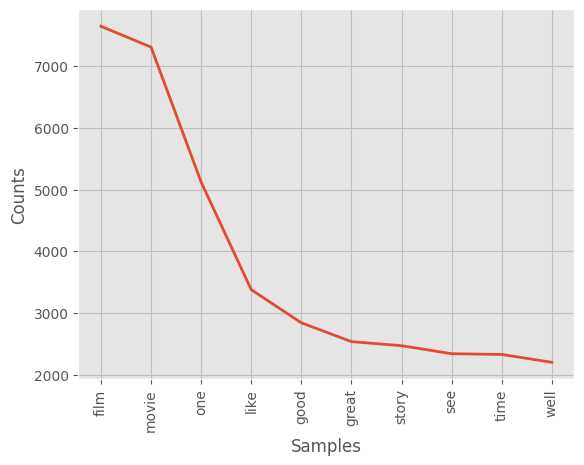

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [64]:
dictionary_of_frequency_of_positive_word.plot(10)

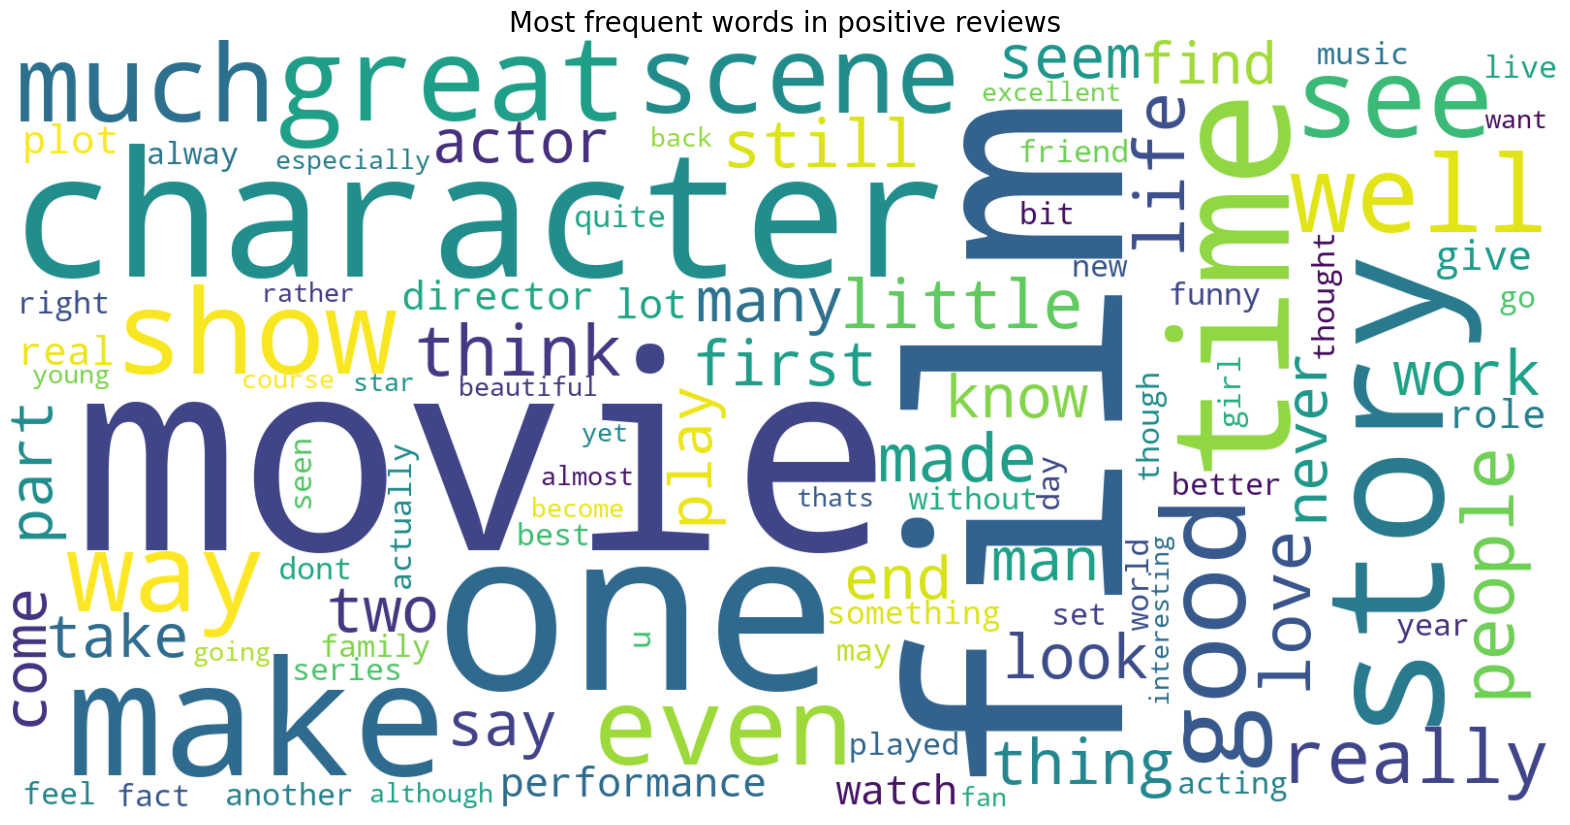

In [65]:
### use wordcloud to visualize positive review
text = ' '.join([word for word in pos_reviews['review']])
plt.figure(figsize=(20,15), facecolor='none')
wordcloud = WordCloud(max_words=100, width=1600,background_color ='white', height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive reviews', fontsize = 20)
plt.show()

In [66]:
### For negative review(seperate negative review)
neg_reviews = data[data.sentiment == 0]
neg_reviews.head()

,review,sentiment,Total Words
3,basically theres family little boy jake thinks...,0,67
7,show amazing fresh innovative idea 70s first a...,0,83
8,encouraged positive comments film looking forw...,0,64
10,phil alien one quirky films humour based aroun...,0,51
11,saw movie 12 came recall scariest scene big bi...,0,84


In [68]:
### count of Most frequent words in positive review
Whole_Nagative_Words_list=[text for text in neg_reviews['review']]
Whole_Nagative_Words_list=" ".join(Whole_Nagative_Words_list)
Whole_Nagative_Words_list=Whole_Nagative_Words_list.split()

In [69]:
dictionary_of_frequency_of_negative_word=FreqDist(Whole_Nagative_Words_list)

dictionary_of_frequency_of_negative_word

FreqDist({'movie': 9521, 'film': 6933, 'one': 4828, 'like': 4447, 'even': 3059, 'good': 2921, 'would': 2841, 'bad': 2836, 'really': 2342, 'time': 2265, ...})

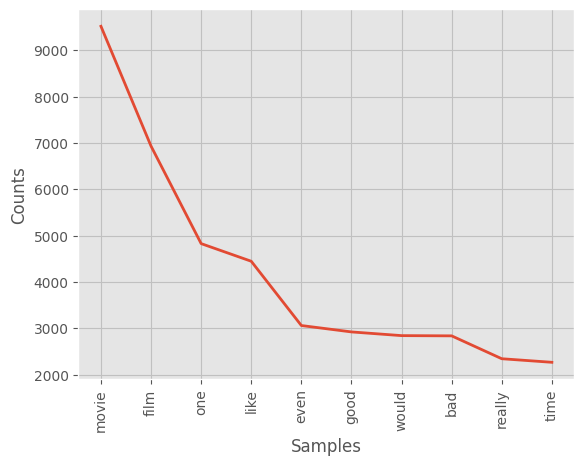

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [71]:
dictionary_of_frequency_of_negative_word.plot(10)

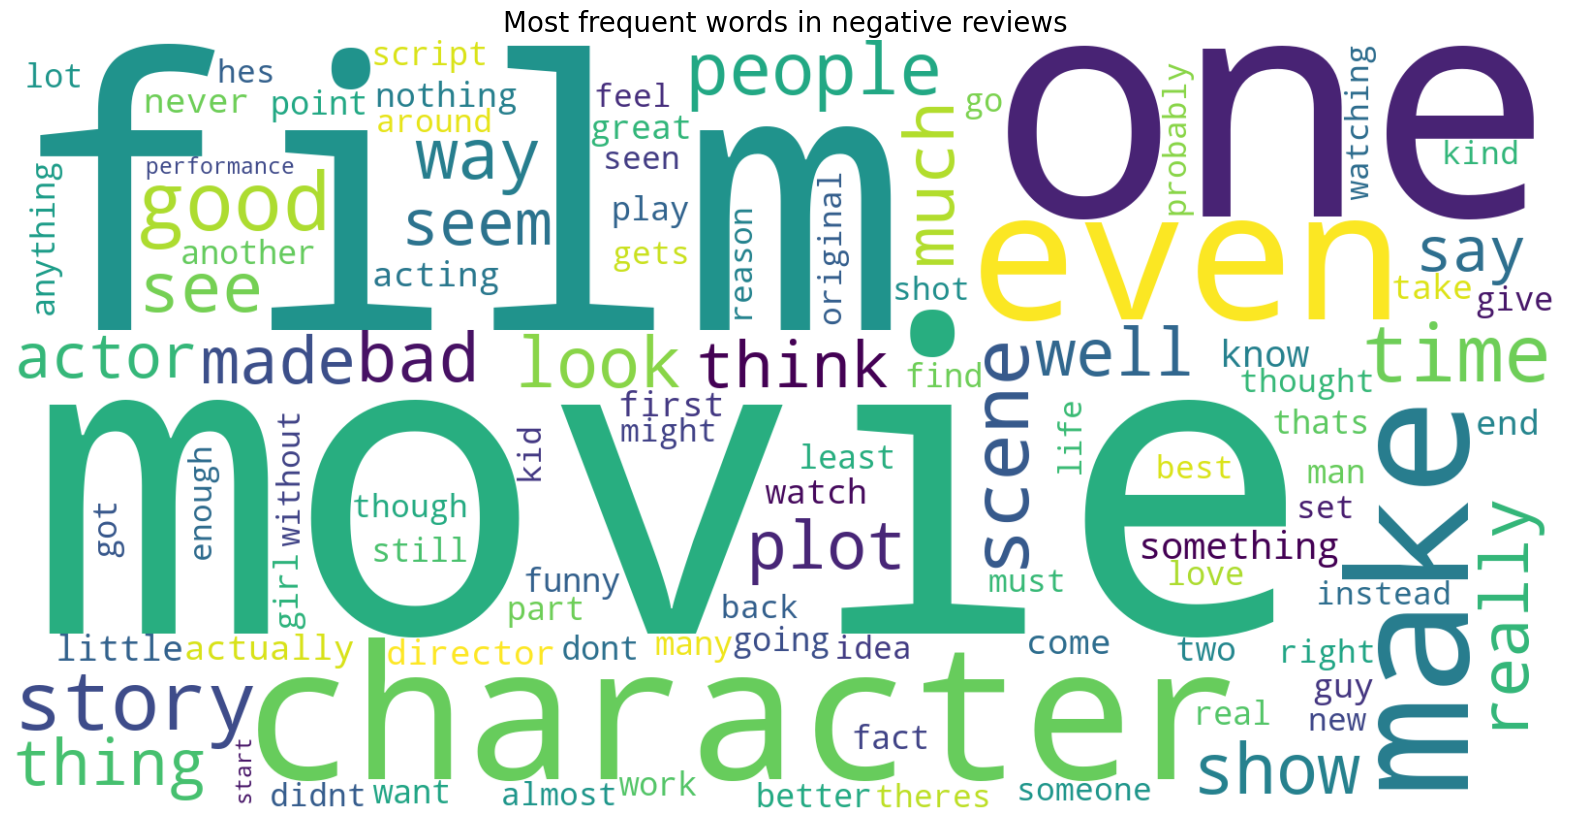

In [72]:
### Wordclud for negative review
text = ' '.join([word for word in neg_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=100, width=1600,background_color ='white', height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative reviews', fontsize = 20)
plt.show()

### Split data into x and y


In [73]:
### x data will contain the verified review of the users 
### y data contains feedback of users in terms of sentiments polarity
X = data['review']
Y = data['sentiment']

In [74]:
### after splitting, vectorize the data for transformation
vect = TfidfVectorizer()
X = vect.fit_transform(data['review'])

In [75]:
with open('../Models/Vectorizer.pickle',"wb") as f:
    pickle.dump(vect,f)

In [76]:
X.shape

(10000, 82658)

In [77]:
### split the data into training and testing set with test size of 30 percentage
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=42)

In [78]:
### print size of training and testing data
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (7000, 82658)
Size of y_train:  (7000,)
Size of x_test:  (3000, 82658)
Size of y_test:  (3000,)


In [79]:
### convert x data into ndarray before building neural networks
x_train = x_train.toarray()
x_test = x_test.toarray()

In [80]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [83]:
### import libraries to create neural netrwork model
from keras.models import Sequential                        ### sequential help to create neural network layer by layer
from keras.layers import Dense                             ### used to define dence layeer in neural networks

In [84]:
### define neural network model
##  load seqential library so that we can add layers to model
model = Sequential()

##  (add 1st dence layer)adding 16 numbers of neurons to 
#   1st dence layer with relu activation function and size of input dimension
model.add(Dense(units=16, activation='relu', input_dim=x_train.shape[1]))

### add 2nd layer which is hidden layer and add 8 number of neuron to 2nd layer with relu activation function
model.add(Dense(units=8, activation='relu'))

### add output layer , output has 2 values... set one node for output layer with sigmoid  activation function
model.add(Dense(units=1, activation='sigmoid'))

In [85]:
## define optimizer, loss function and the matrix for the model using model.compile
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])  ## values vary as per application

In [86]:
history = model.fit(x_train, y_train, batch_size=10, epochs=15)

Epoch 1/15
700/700 [==============================] - 46s 27ms/step - loss: 0.4797 - accuracy: 0.8241
Epoch 2/15
700/700 [==============================] - 17s 25ms/step - loss: 0.1806 - accuracy: 0.9379
Epoch 3/15
700/700 [==============================] - 18s 25ms/step - loss: 0.1089 - accuracy: 0.9620
Epoch 4/15
700/700 [==============================] - 17s 25ms/step - loss: 0.0788 - accuracy: 0.9724
Epoch 5/15
700/700 [==============================] - 18s 26ms/step - loss: 0.0576 - accuracy: 0.9811
Epoch 6/15
700/700 [==============================] - 17s 24ms/step - loss: 0.0459 - accuracy: 0.9844
Epoch 7/15
700/700 [==============================] - 17s 24ms/step - loss: 0.0374 - accuracy: 0.9874
Epoch 8/15
700/700 [==============================] - 17s 24ms/step - loss: 0.0313 - accuracy: 0.9894
Epoch 9/15
700/700 [==============================] - 17s 25ms/step - loss: 0.0269 - accuracy: 0.9916
Epoch 10/15
700/700 [==============================] - 18s 25ms/step - loss: 0.023

In [87]:
## see summary of model created using summary function
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                1322544   
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,322,689
Trainable params: 1,322,689
Non-trainable params: 0
_________________________________________________________________


In [89]:
## Evaluate model performance by measuring accuracy and loss on testing data
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


94/94 [==============================] - 1s 9ms/step - loss: 0.7218 - accuracy: 0.8567
Test loss: 0.7218338847160339
Test accuracy: 0.8566666841506958


In [90]:
model.save('../Models/NeuralNetworkModel.h5')

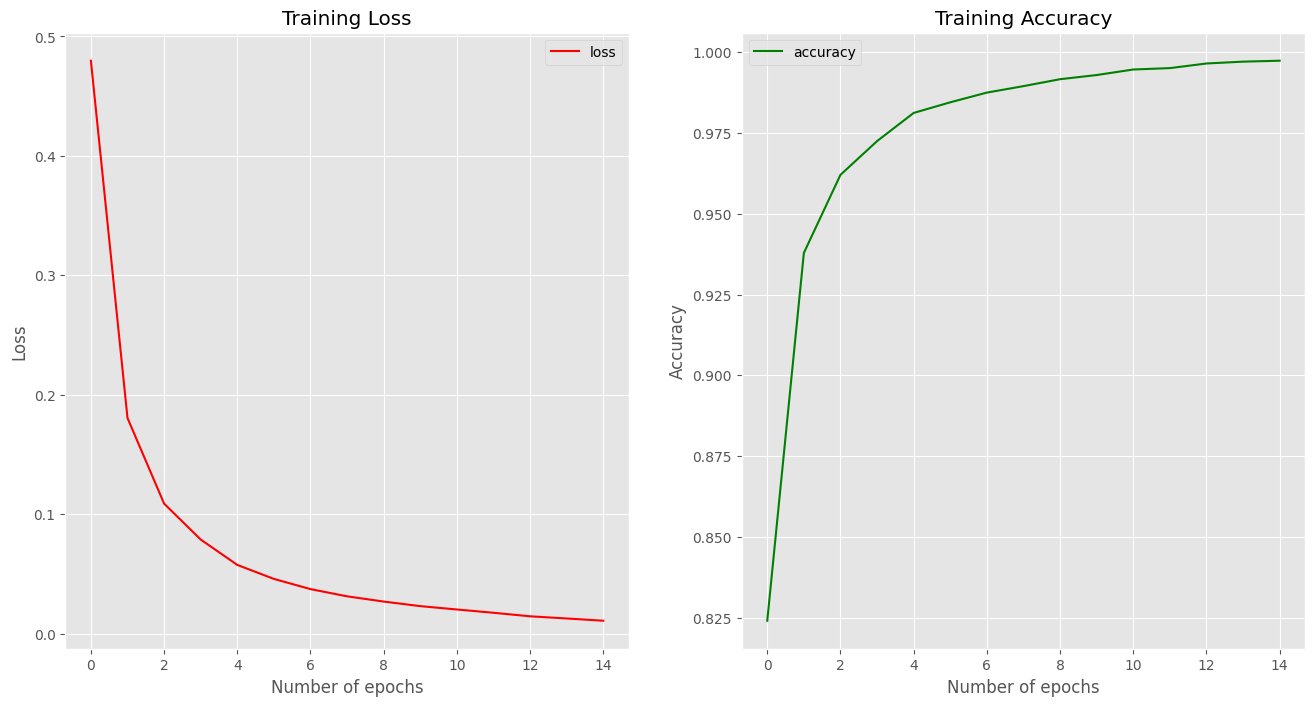

In [92]:
## plot a graph of accuracy and loss
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], color='r', label='loss')
plt.title('Training Loss')
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], color='g', label='accuracy')
plt.title('Training Accuracy')
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()